# Laboratorio 2 - Agrupación

*   Jaime Torres - 202014866
*   Juan Guillermo Gutiérrez - 202122659
*   Maria Luisa Rodríguez -202121549

In [ ]:
# Instalación de librerias
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import re
import joblib

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import  SnowballStemmer, WordNetLemmatizer
from nltk.corpus import wordnet as wn

pd.options.mode.chained_assignment = None

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


## 1) Preparación de Datos

Descripcion del caso de negocio y de las variables.

In [ ]:
url = 'https://github.com/BI-DATASCIENCE/Lab2/raw/main/data/'
lab_data: pd.DataFrame = pd.read_csv(url + 'Lab2_data.csv')
raw_data = lab_data.copy()
raw_data


,Grupo,Sexo,Edad,Modo_Llegada,Lesion,Queja_Principal,Estado_Mental,Dolor,dolor_NRS,SBP,...,BT,Saturacion,KTAS_enfermera,Diagnostico_En_Urgencias,Disposicion,KTAS_experto,Grupo_De_Error,Duracion_Estancia_Min,Duracion_KTAS_Min,Error_Triaje
0,2,2,49,2,1,ant. chest pain,1,1,2,150.0,...,36.2,98.0,2,Ischaemic chest pain,2,2,0,1591,"2,00",0
1,2,2,30,4,1,headache,1,1,4,140.0,...,36.3,99.0,3,"Subarachnoid haemorrhage, unspecified",7,3,0,211,"3,00",0
2,2,1,61,3,2,ant. chest pain,1,1,3,100.0,...,36.4,98.0,4,Contusion of front wall of thorax,1,4,0,119,"2,00",0
3,2,2,61,3,1,headache,1,1,4,120.0,...,36.5,99.0,4,Headache,1,3,4,414,"2,00",2
4,1,2,67,3,1,fever & chill,1,0,#BOÞ!,143.0,...,38.1,NaN,4,Fever,1,2,1,267,"3,60",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,2,73,4,1,fever,1,0,#BOÞ!,117.0,...,36.8,NaN,4,Fever,2,4,0,620,"9,75",0
996,1,1,27,3,1,Suicidal Attempt,1,0,#BOÞ!,110.0,...,36.2,NaN,3,Suicide tendency,2,3,0,442,"7,42",0
997,1,2,54,2,1,"pain, chest",1,1,6,159.0,...,36.6,NaN,2,Gastroesophageal reflux disease,1,2,0,214,"4,95",0
998,1,1,19,3,1,eye discomfort,1,0,#BOÞ!,132.0,...,36.5,NaN,4,Corneal erosion,1,4,0,50,"3,45",0


### 1.1) Entendimiento de los Datos

Descripción de los datos

In [ ]:
raw_data.shape

(1000, 23)

In [ ]:
raw_data.dtypes

,0
Grupo,int64
Sexo,int64
Edad,int64
Modo_Llegada,int64
Lesion,int64
Queja_Principal,object
Estado_Mental,int64
Dolor,int64
dolor_NRS,object
SBP,float64


In [ ]:
raw_data.columns

Index(['Grupo', 'Sexo', 'Edad', 'Modo_Llegada', 'Lesion', 'Queja_Principal',
       'Estado_Mental', 'Dolor', 'dolor_NRS', 'SBP', 'DBP', 'HR', 'RR', 'BT',
       'Saturacion', 'KTAS_enfermera', 'Diagnostico_En_Urgencias',
       'Disposicion', 'KTAS_experto', 'Grupo_De_Error',
       'Duracion_Estancia_Min', 'Duracion_KTAS_Min', 'Error_Triaje'],
      dtype='object')

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Grupo                     1000 non-null   int64  
 1   Sexo                      1000 non-null   int64  
 2   Edad                      1000 non-null   int64  
 3   Modo_Llegada              1000 non-null   int64  
 4   Lesion                    1000 non-null   int64  
 5   Queja_Principal           1000 non-null   object 
 6   Estado_Mental             1000 non-null   int64  
 7   Dolor                     1000 non-null   int64  
 8   dolor_NRS                 1000 non-null   object 
 9   SBP                       983 non-null    float64
 10  DBP                       979 non-null    float64
 11  HR                        988 non-null    float64
 12  RR                        985 non-null    float64
 13  BT                        989 non-null    float64
 14  Saturacio

datos numericos

In [ ]:
raw_data.describe()

,Grupo,Sexo,Edad,Modo_Llegada,Lesion,Estado_Mental,Dolor,SBP,DBP,HR,RR,BT,Saturacion,KTAS_enfermera,Disposicion,KTAS_experto,Grupo_De_Error,Duracion_Estancia_Min,Error_Triaje
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,983.000000,979.000000,988.000000,985.000000,989.000000,444.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.450000,1.514000,53.892000,2.811000,1.2000,1.103000,0.562000,133.485249,79.566905,84.400810,19.450761,36.562993,97.047297,3.328000,1.610000,3.260000,0.569000,12792.480000,0.253000
std,0.497743,0.500054,19.826483,0.796186,0.4002,0.431946,0.496389,27.156136,15.174593,16.297428,2.069882,0.519699,4.761112,0.862067,1.161572,0.865534,1.587375,87721.151446,0.630387
min,1.000000,1.000000,16.000000,1.000000,1.0000,1.000000,0.000000,50.000000,31.000000,32.000000,14.000000,35.000000,20.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,36.000000,2.000000,1.0000,1.000000,0.000000,114.000000,70.000000,73.000000,18.000000,36.200000,97.000000,3.000000,1.000000,3.000000,0.000000,132.750000,0.000000
50%,1.000000,2.000000,56.000000,3.000000,1.0000,1.000000,1.000000,130.000000,80.000000,82.000000,20.000000,36.500000,98.000000,3.000000,1.000000,3.000000,0.000000,270.500000,0.000000
75%,2.000000,2.000000,70.250000,3.000000,1.0000,1.000000,1.000000,150.000000,90.000000,96.000000,20.000000,36.800000,99.000000,4.000000,2.000000,4.000000,0.000000,620.000000,0.000000
max,2.000000,2.000000,94.000000,7.000000,2.0000,4.000000,1.000000,275.000000,160.000000,148.000000,30.000000,39.800000,100.000000,5.000000,7.000000,5.000000,9.000000,709510.000000,2.000000


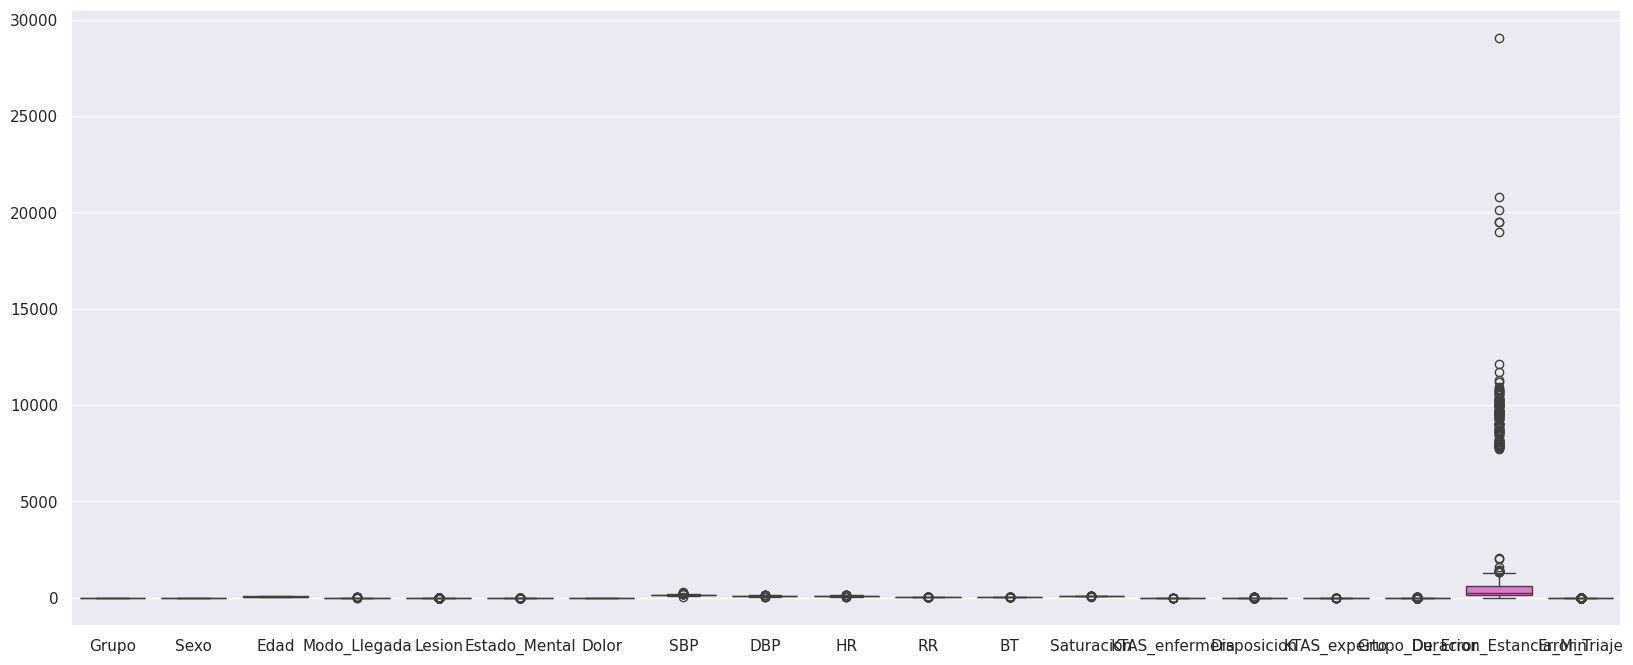

In [ ]:
raw_data.drop(raw_data[raw_data.Duracion_Estancia_Min > 200000].index, inplace=True)


fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=raw_data, orient="v")


graficas de barras, notebook agrupación

datos no numericos

In [ ]:
raw_data['Queja_Principal'].value_counts()

,count
Queja_Principal,
abd pain,61
dizziness,53
dyspnea,42
ant. chest pain,37
fever,29
...,...
For IV injection,1
right lower quadrant abdominal pain,1
Sexual Abuse of Adult,1


In [ ]:
raw_data['Diagnostico_En_Urgencias'].value_counts()

,count
Diagnostico_En_Urgencias,
Acute gastroenteritis,39
Headache,23
Dizziness,20
Unspecified abdominal pain,19
Ischaemic chest pain,17
...,...
"Ingested mushrooms, toxic effect of",1
"Pain in limb, hip (joint)",1
"Colon cancer, sigmoid",1


In [ ]:
non_number = ['Queja_Principal', 'Diagnostico_En_Urgencias']
raw_data[non_number].describe()

,Queja_Principal,Diagnostico_En_Urgencias
count,984,983
unique,344,480
top,abd pain,Acute gastroenteritis
freq,61,39


Agregar tablitas cheveres de barras como en bicialpes

### 1.2) Selección de Variables Relevantes

descripcion de porque se van a eliminar algunas variables segun las reglas de dependencia y el heatmap

<Axes: >

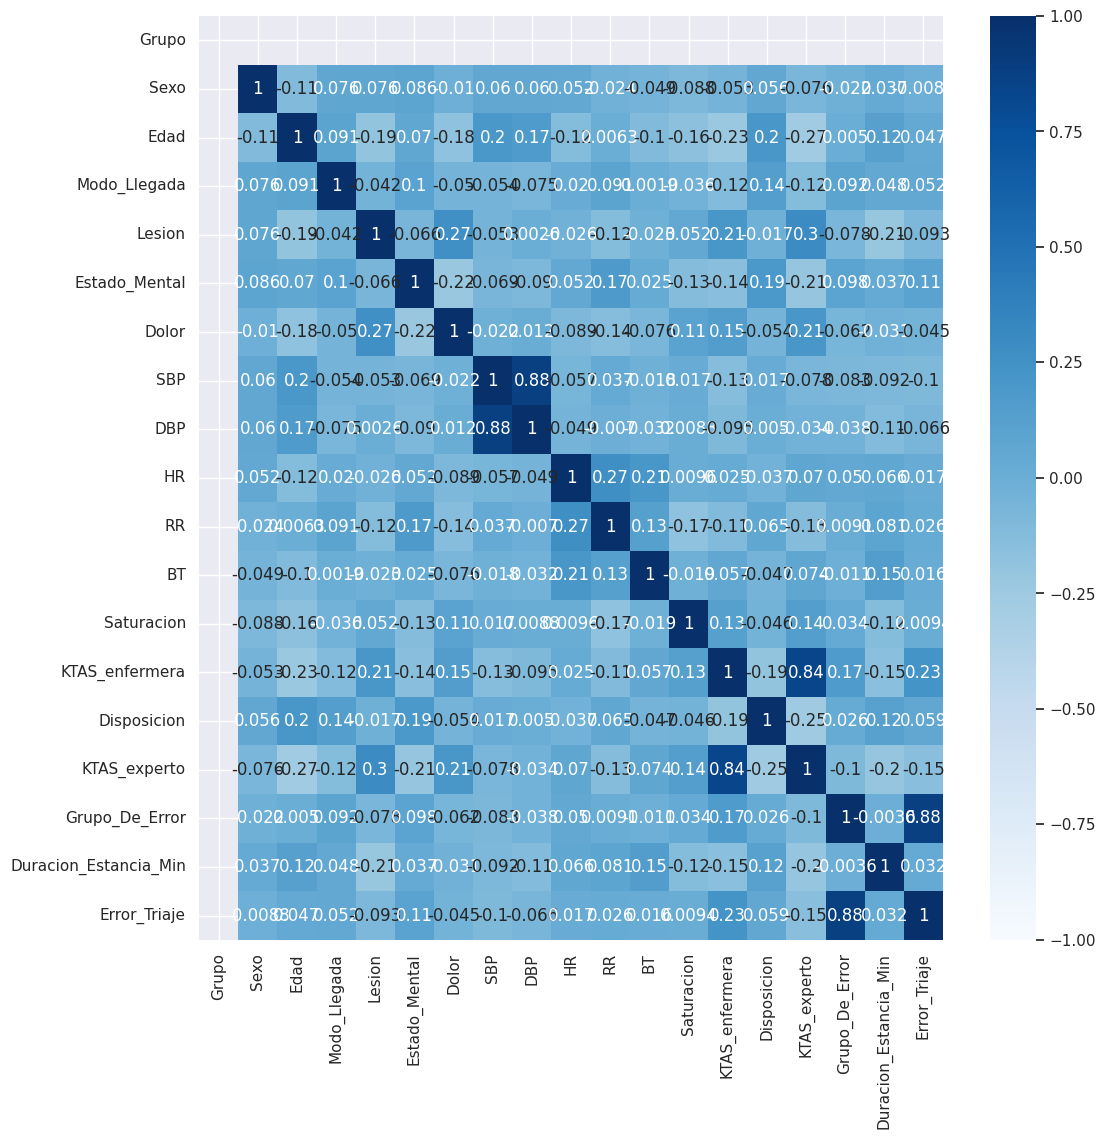

In [ ]:
vit_filter = raw_data.drop(columns=['Queja_Principal', 'Diagnostico_En_Urgencias', 'dolor_NRS', 'Duracion_KTAS_Min'])
filtered_ya = vit_filter.dropna()
plt.figure(figsize=(12, 12))
sns.heatmap(filtered_ya.corr(), cmap="Blues", vmin=-1, vmax=1, annot = True)

columnas que se quitan:

In [ ]:
cols_drop = ['Grupo', 'Modo_Llegada', 'Grupo_De_Error', 'Error_Triaje', 'KTAS_enfermera', 'DBP']
raw_data = raw_data.drop(columns=cols_drop)

print("Siguiendo estas convenciones, las variables que se prepararán para el modelo son: ")
list(raw_data.columns)

Siguiendo estas convenciones, las variables que se prepararán para el modelo son: 


['Sexo',
 'Edad',
 'Lesion',
 'Queja_Principal',
 'Estado_Mental',
 'Dolor',
 'dolor_NRS',
 'SBP',
 'HR',
 'RR',
 'BT',
 'Saturacion',
 'Diagnostico_En_Urgencias',
 'Disposicion',
 'KTAS_experto',
 'Duracion_Estancia_Min',
 'Duracion_KTAS_Min']

### 1.3) Completitud

No se eliminarán las columnas con valores faltantes.

imputar por la media o la mediana, o calcularlas mediante otra columna categorica.




In [ ]:
# Cálculo de porcentaje de valores nulos por columna
((raw_data.isnull().sum()/raw_data.shape[0])).sort_values(ascending=False)

,0
Saturacion,0.565041
SBP,0.017276
RR,0.015244
HR,0.012195
BT,0.011179
Diagnostico_En_Urgencias,0.001016
Duracion_Estancia_Min,0.000000
KTAS_experto,0.000000
Disposicion,0.000000
Sexo,0.000000


explicacion de nulos, correccion de nulos:
signos vitales: mean?? mode?? idk
diagnostico en urgencias: reemplazar por unknown

eg.
También, se observa que la columna Day_of_Week cuenta con un porcentaje del 0.0035559 de datos nulos, así que es posible para evitar perder la información de esas fila, completarla con un valor constante, como "desconocido", esta propuesta se valida con las personas técnicas de BiciAlpes para llegar a una decisión .

In [ ]:
cols_drop = ['Saturacion']
raw_data = raw_data.drop(columns=cols_drop)

columnas = ['SBP', 'RR', 'HR', 'BT']

for col in columnas:
    moda = raw_data[col].mode()[0]
    raw_data[col].fillna(moda, inplace=True)

((raw_data.isnull().sum()/raw_data.shape[0])).sort_values(ascending=False)

,0
Diagnostico_En_Urgencias,0.001016
Sexo,0.000000
Edad,0.000000
Lesion,0.000000
Queja_Principal,0.000000
Estado_Mental,0.000000
Dolor,0.000000
dolor_NRS,0.000000
SBP,0.000000
HR,0.000000


### 1.4) Unicidad

Identificar las filas que tienen valores totalmente idénticos.


In [ ]:
raw_data.duplicated(keep = False).sum()

64

son exactamente los mismos valores en esas 66 columnas tonces eliminar esos valores para evitar la multicolinealidad, afecta los centroides y eso...

In [ ]:
raw_data = raw_data.drop_duplicates()
raw_data.duplicated(keep = False).sum()

0

### 1.5) Consistencia

correcion de Dolor_NRS por la inconsistencia del bop.



In [ ]:
#correccion de Dolor_NRS
raw_data['dolor_NRS'] = raw_data['dolor_NRS'].replace('#BOÞ!', 0)
print("Número de filas después de eliminar inconsistencias:", raw_data.shape[0])

inconsistencias_sin_dolor = raw_data[(raw_data['Dolor'] == 0) & (raw_data['dolor_NRS'] != 0)]
print("Inconsistencias sin dolor:", inconsistencias_sin_dolor.shape[0])

inconsistencias_con_dolor = raw_data[(raw_data['Dolor'] == 1) & (raw_data['dolor_NRS'] == 0)]
print("Inconsistencias con dolor:", inconsistencias_con_dolor.shape[0])

raw_data = raw_data[~((raw_data['Dolor'] == 0) & (raw_data['dolor_NRS'] != 0)) & ~((raw_data['Dolor'] == 1) & (raw_data['dolor_NRS'] == 0))]
print("Número de filas después de eliminar inconsistencias:", raw_data.shape[0])

raw_data = raw_data.drop('Dolor',axis=1)

Número de filas después de eliminar inconsistencias: 952
Inconsistencias sin dolor: 0
Inconsistencias con dolor: 2
Número de filas después de eliminar inconsistencias: 950


explicacion one hot encoding y eliminacion de la primera columna del one hot

In [ ]:
#one hot encoding
cat_cols = ['Sexo','Lesion', 'Estado_Mental', 'Disposicion', 'KTAS_experto']

raw_data = pd.get_dummies(raw_data, columns=cat_cols, drop_first=True, dtype=int)
print(raw_data.head())

   Edad  Queja_Principal dolor_NRS    SBP     HR    RR    BT  \
0    49  ant. chest pain         2  150.0   92.0  20.0  36.2   
1    30         headache         4  140.0   76.0  20.0  36.3   
2    61  ant. chest pain         3  100.0   84.0  20.0  36.4   
3    61         headache         4  120.0   76.0  20.0  36.5   
4    67    fever & chill         0  143.0  130.0  20.0  38.1   

                Diagnostico_En_Urgencias  Duracion_Estancia_Min  \
0                   Ischaemic chest pain                   1591   
1  Subarachnoid haemorrhage, unspecified                    211   
2      Contusion of front wall of thorax                    119   
3                               Headache                    414   
4                                  Fever                    267   

  Duracion_KTAS_Min  ...  Disposicion_2  Disposicion_3  Disposicion_4  \
0              2,00  ...              1              0              0   
1              3,00  ...              0              0            

### 1.6) Validez

explicacion de validez y cambio de duracon ktas min

In [ ]:
columnas_numericas = raw_data.select_dtypes(include=['number']).columns
raw_data = raw_data[(raw_data[columnas_numericas] >= 0).all(axis=1)]

raw_data["Duracion_KTAS_Min"].astype(str)
raw_data["Duracion_KTAS_Min"] = raw_data["Duracion_KTAS_Min"].str.replace(",", ".")
raw_data["Duracion_KTAS_Min"] = pd.to_numeric(raw_data["Duracion_KTAS_Min"], errors='coerce')
raw_data["Duracion_KTAS_Min"]




,Duracion_KTAS_Min
0,2.00
1,3.00
2,2.00
3,2.00
4,3.60
...,...
962,2.00
963,4.00
964,2.00
965,11.32


### 1.7) Preparación de Datos No Numéricos

limpieza de datos (mayuscualas, puntuacion)
CAMBIAR SIGNOS DE INTERROGACION POR 'unknown'

In [ ]:
#limpieza

def corregir_caracteres(texto):
    if isinstance(texto, str):
        texto = texto.replace('Ã¡', 'á').replace('Ã©', 'é').replace('Ã­', 'í')
        texto = texto.replace('Ã³', 'ó').replace('Ãº', 'ú').replace('Ã±', 'ñ')
        texto = texto.replace('Ã', 'í').replace('Â', '')
        texto = texto.replace('â€œ', '').replace('â€', '').replace('â€˜', '').replace('â€™', '')
    return texto

# poner todo en minuscula
def to_lowercase(palabras):
  return [palabra.lower() for palabra in palabras]


#quitar puntuación
def remove_punctuation(palabras):
  new_words = []
  for word in palabras:
    if word is not None:
      new_word = re.sub(r'[^\w\s]', '', word)
      if new_word != '':
         new_words.append(new_word)
  return new_words

#reemplazar ?
def set_unknown(palabras):
  new_words = []
  for word in palabras:
    if '?' in word:
      new_words.append('unknown')
    else:
      new_words.append(word)
  return new_words

def preprocessing(palabras):
    palabras = corregir_caracteres(palabras)
    palabras = to_lowercase(palabras)
    palabras = remove_punctuation(palabras)
    palabras = set_unknown(palabras)
    return palabras

tokenizacion

In [ ]:
raw_data['Diagnostico_En_Urgencias'] = raw_data['Diagnostico_En_Urgencias'].fillna('unknown')

raw_data['Queja_Principal'] = raw_data['Queja_Principal'].apply(word_tokenize)
raw_data['Diagnostico_En_Urgencias'] = raw_data['Diagnostico_En_Urgencias'].apply(word_tokenize)

raw_data['Queja_Principal'] = raw_data['Queja_Principal'].apply(preprocessing)
raw_data['Diagnostico_En_Urgencias'] = raw_data['Diagnostico_En_Urgencias'].apply(preprocessing)

raw_data

,Edad,Queja_Principal,dolor_NRS,SBP,HR,RR,BT,Diagnostico_En_Urgencias,Duracion_Estancia_Min,Duracion_KTAS_Min,...,Disposicion_2,Disposicion_3,Disposicion_4,Disposicion_5,Disposicion_6,Disposicion_7,KTAS_experto_2,KTAS_experto_3,KTAS_experto_4,KTAS_experto_5
0,49,"[ant, chest, pain]",2,150.0,92.0,20.0,36.2,"[ischaemic, chest, pain]",1591,2.00,...,1,0,0,0,0,0,1,0,0,0
1,30,[headache],4,140.0,76.0,20.0,36.3,"[subarachnoid, haemorrhage, unspecified]",211,3.00,...,0,0,0,0,0,1,0,1,0,0
2,61,"[ant, chest, pain]",3,100.0,84.0,20.0,36.4,"[contusion, of, front, wall, of, thorax]",119,2.00,...,0,0,0,0,0,0,0,0,1,0
3,61,[headache],4,120.0,76.0,20.0,36.5,[headache],414,2.00,...,0,0,0,0,0,0,0,1,0,0
4,67,"[fever, chill]",0,143.0,130.0,20.0,38.1,[fever],267,3.60,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,64,[dysarthria],0,130.0,98.0,20.0,36.4,"[cerebral, infarction, due, to, thrombosis, of...",356,2.00,...,1,0,0,0,0,0,0,1,0,0
963,70,"[dz, dizziness]",0,180.0,80.0,20.0,36.0,"[vestibular, neuronitis]",456,4.00,...,0,0,0,0,0,0,1,0,0,0
964,75,[dysarthria],0,120.0,68.0,20.0,36.4,"[cerebrovascular, accident, nos]",278,2.00,...,1,0,0,0,0,0,0,1,0,0
965,26,"[sexual, violence]",0,117.0,83.0,16.0,36.0,"[sexual, abuse, of, adult]",199,11.32,...,0,0,0,0,0,0,0,0,1,0


normalización

In [ ]:
#normalizacion
def lemm_words(tokens):
  lemmatizer = WordNetLemmatizer()
  return [lemmatizer.lemmatize(token.lower()) for token in tokens]

raw_data['Queja_Principal'] = raw_data['Queja_Principal'].apply(lemm_words)
raw_data['Diagnostico_En_Urgencias'] = raw_data['Diagnostico_En_Urgencias'].apply(lemm_words)
raw_data

,Edad,Queja_Principal,dolor_NRS,SBP,HR,RR,BT,Diagnostico_En_Urgencias,Duracion_Estancia_Min,Duracion_KTAS_Min,...,Disposicion_2,Disposicion_3,Disposicion_4,Disposicion_5,Disposicion_6,Disposicion_7,KTAS_experto_2,KTAS_experto_3,KTAS_experto_4,KTAS_experto_5
0,49,"[ant, chest, pain]",2,150.0,92.0,20.0,36.2,"[ischaemic, chest, pain]",1591,2.00,...,1,0,0,0,0,0,1,0,0,0
1,30,[headache],4,140.0,76.0,20.0,36.3,"[subarachnoid, haemorrhage, unspecified]",211,3.00,...,0,0,0,0,0,1,0,1,0,0
2,61,"[ant, chest, pain]",3,100.0,84.0,20.0,36.4,"[contusion, of, front, wall, of, thorax]",119,2.00,...,0,0,0,0,0,0,0,0,1,0
3,61,[headache],4,120.0,76.0,20.0,36.5,[headache],414,2.00,...,0,0,0,0,0,0,0,1,0,0
4,67,"[fever, chill]",0,143.0,130.0,20.0,38.1,[fever],267,3.60,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,64,[dysarthria],0,130.0,98.0,20.0,36.4,"[cerebral, infarction, due, to, thrombosis, of...",356,2.00,...,1,0,0,0,0,0,0,1,0,0
963,70,"[dz, dizziness]",0,180.0,80.0,20.0,36.0,"[vestibular, neuronitis]",456,4.00,...,0,0,0,0,0,0,1,0,0,0
964,75,[dysarthria],0,120.0,68.0,20.0,36.4,"[cerebrovascular, accident, no]",278,2.00,...,1,0,0,0,0,0,0,1,0,0
965,26,"[sexual, violence]",0,117.0,83.0,16.0,36.0,"[sexual, abuse, of, adult]",199,11.32,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
raw_data

,Edad,Queja_Principal,dolor_NRS,SBP,HR,RR,BT,Diagnostico_En_Urgencias,Duracion_Estancia_Min,Duracion_KTAS_Min,...,Disposicion_2,Disposicion_3,Disposicion_4,Disposicion_5,Disposicion_6,Disposicion_7,KTAS_experto_2,KTAS_experto_3,KTAS_experto_4,KTAS_experto_5
0,49,"[ant, chest, pain]",2,150.0,92.0,20.0,36.2,"[ischaemic, chest, pain]",1591,2.00,...,1,0,0,0,0,0,1,0,0,0
1,30,[headache],4,140.0,76.0,20.0,36.3,"[subarachnoid, haemorrhage, unspecified]",211,3.00,...,0,0,0,0,0,1,0,1,0,0
2,61,"[ant, chest, pain]",3,100.0,84.0,20.0,36.4,"[contusion, of, front, wall, of, thorax]",119,2.00,...,0,0,0,0,0,0,0,0,1,0
3,61,[headache],4,120.0,76.0,20.0,36.5,[headache],414,2.00,...,0,0,0,0,0,0,0,1,0,0
4,67,"[fever, chill]",0,143.0,130.0,20.0,38.1,[fever],267,3.60,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,64,[dysarthria],0,130.0,98.0,20.0,36.4,"[cerebral, infarction, due, to, thrombosis, of...",356,2.00,...,1,0,0,0,0,0,0,1,0,0
963,70,"[dz, dizziness]",0,180.0,80.0,20.0,36.0,"[vestibular, neuronitis]",456,4.00,...,0,0,0,0,0,0,1,0,0,0
964,75,[dysarthria],0,120.0,68.0,20.0,36.4,"[cerebrovascular, accident, no]",278,2.00,...,1,0,0,0,0,0,0,1,0,0
965,26,"[sexual, violence]",0,117.0,83.0,16.0,36.0,"[sexual, abuse, of, adult]",199,11.32,...,0,0,0,0,0,0,0,0,1,0


## 2) Modelamiento

In [ ]:
raw_data.columns

Index(['Edad', 'Queja_Principal', 'dolor_NRS', 'SBP', 'HR', 'RR', 'BT',
       'Diagnostico_En_Urgencias', 'Duracion_Estancia_Min',
       'Duracion_KTAS_Min', 'Sexo_2', 'Lesion_2', 'Estado_Mental_2',
       'Estado_Mental_3', 'Estado_Mental_4', 'Disposicion_2', 'Disposicion_3',
       'Disposicion_4', 'Disposicion_5', 'Disposicion_6', 'Disposicion_7',
       'KTAS_experto_2', 'KTAS_experto_3', 'KTAS_experto_4', 'KTAS_experto_5'],
      dtype='object')

### 2.1) K-Means (p1)

estandarizacion de valores numericos, metodo del codo.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

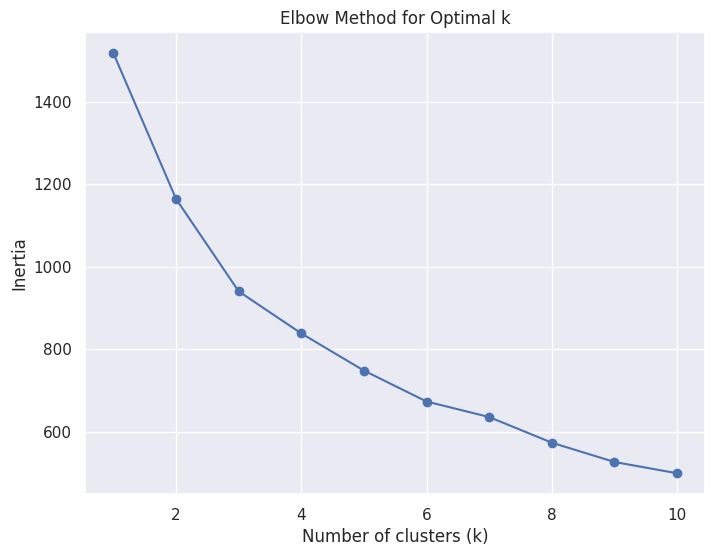

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

numerical_columns = raw_data.select_dtypes(include=[np.number]).columns
data_numerical = raw_data[numerical_columns]

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_numerical)

inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 1 2]


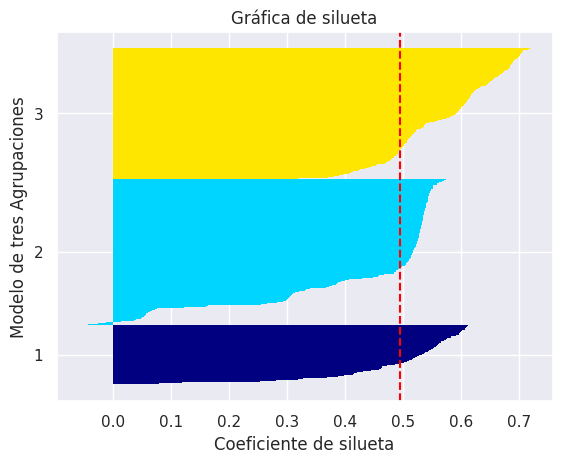

Silhouette Avg:  0.4951934200657479


In [ ]:
def plot_silhouette(data,
                    labels,
                   ylabel = 'Grupos',
                   xlabel = "Coeficiente de silueta",
                   title = 'Gráfica de silueta'):
    '''
    Graficar la silueta de los clusters

    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    labels : np.array
        El arreglo con las etiquetas correspondientes
    ylabel  string
        La etiqueta del eje y
    xlabel : string
        La etiqueta del eje x
    title : string
        El titulo de la gráfica
    '''
    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='cosine')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

    print("Silhouette Avg: ", silhouette_avg)

kmeans2 = KMeans(n_clusters=3, random_state=0)
res_kmeans2 = kmeans2.fit(data_normalized)

plot_silhouette(data = data_normalized,
                labels = res_kmeans2.labels_,
                ylabel = 'Modelo de tres Agrupaciones')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


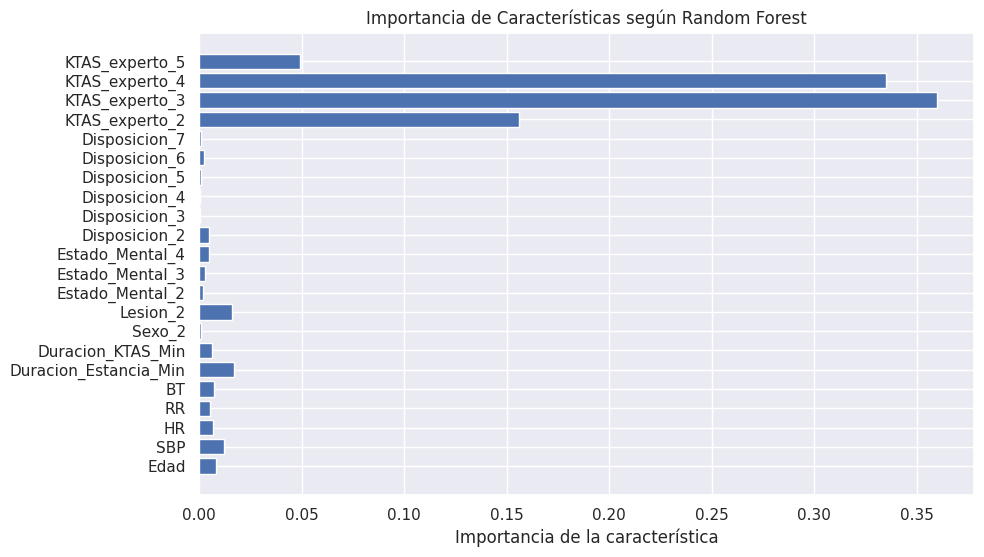

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

#usaremos el resultado de K-Means como "etiqueta" para entrenar el RandomForest
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_normalized)
cluster_labels = kmeans.labels_

# Entrenar un RandomForest para calcular la importancia de características
rf = RandomForestClassifier(random_state=42)
rf.fit(raw_data[numerical_columns], cluster_labels)

# Obtener la importancia de cada característica
importances = rf.feature_importances_
features = numerical_columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Importancia de la característica')
plt.title('Importancia de Características según Random Forest')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

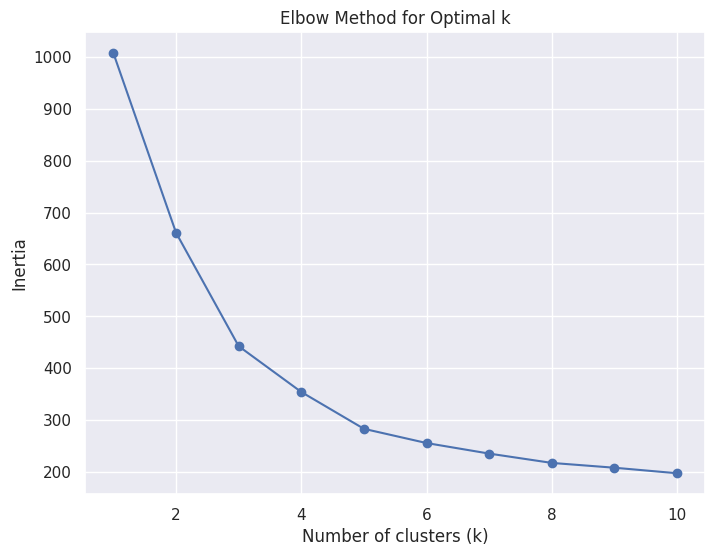

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

ktas_columns = ['Edad', 'dolor_NRS', 'SBP', 'HR', 'RR', 'BT', 'Duracion_Estancia_Min',
       'Duracion_KTAS_Min', 'Lesion_2',
       'KTAS_experto_2', 'KTAS_experto_3', 'KTAS_experto_4', 'KTAS_experto_5']

data_numerical = raw_data[ktas_columns]

# Normalizar datos
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_numerical)

inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 1 2]


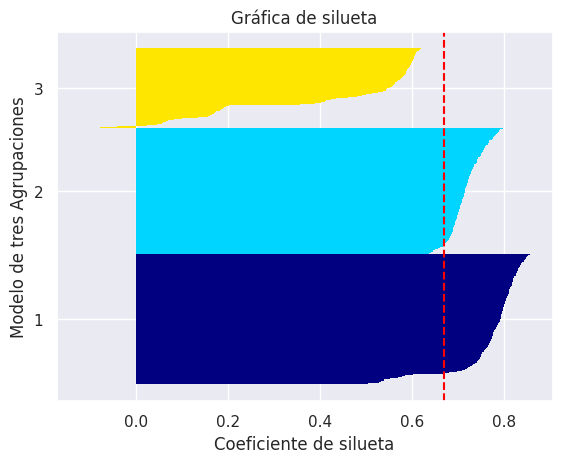

Silhouette Avg:  0.6697449917389313


In [ ]:
kmeans2 = KMeans(n_clusters=3, random_state=0)
res_kmeans2 = kmeans2.fit(data_normalized)

plot_silhouette(data = data_normalized,
                labels = res_kmeans2.labels_,
                ylabel = 'Modelo de tres Agrupaciones')

### 2.2) DB-SCAN (p2)

Número estimado de clusters: 10
Número de puntos de ruido: 0


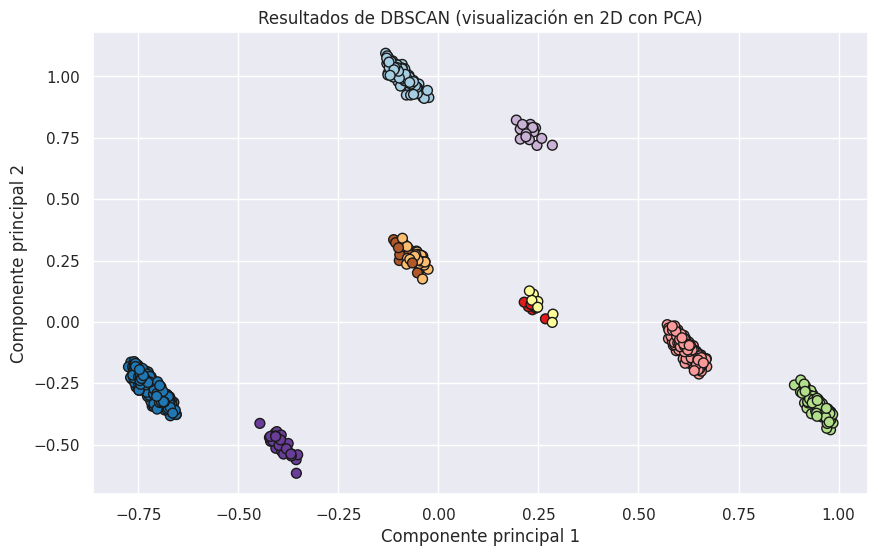

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Implementar DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan.fit(data_normalized)

labels = dbscan.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Número estimado de clusters: {n_clusters_}')
print(f'Número de puntos de ruido: {list(labels).count(-1)}')

# aplicar PCA para reducirlo a dos dimensiones para visualización
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_normalized)

plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='Paired', s=50, edgecolors='k')
plt.title('Resultados de DBSCAN (visualización en 2D con PCA)')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

[0 1 2 3 4 5 6 7 8 9]


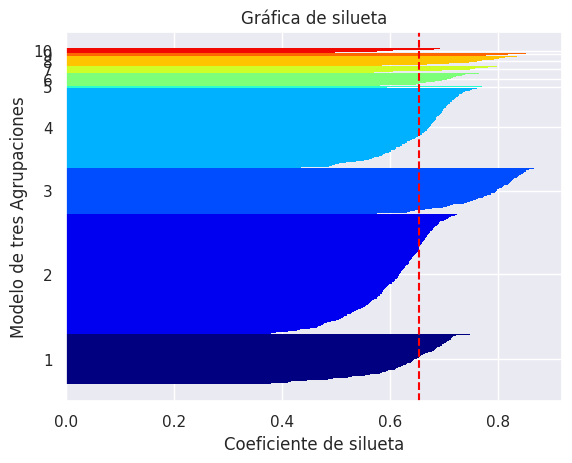

Silhouette Avg:  0.6549884642486684


In [ ]:
dbscan = DBSCAN(eps=1, min_samples=5)
jelp = dbscan.fit(data_normalized)

plot_silhouette(data = data_normalized,
                labels = jelp.labels_,
                ylabel = 'Modelo de tres Agrupaciones')

### 2.3) Agglomerative Clustering (p3)

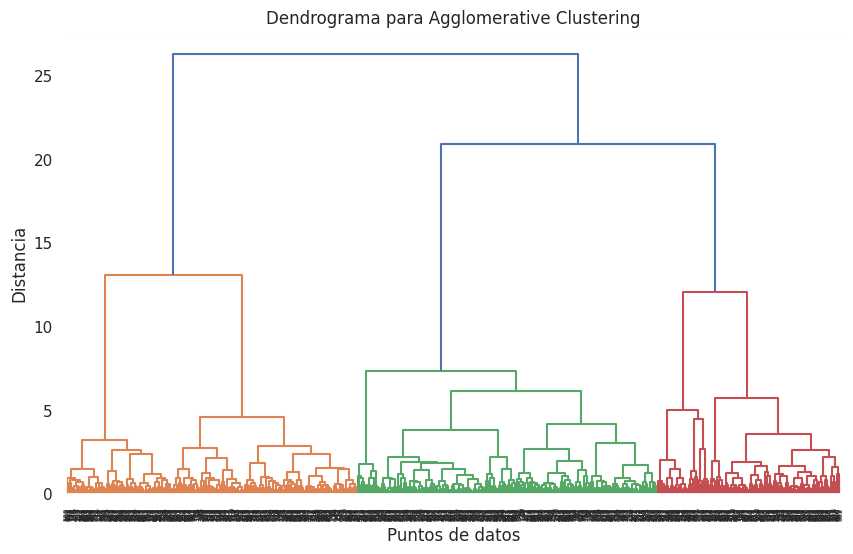

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Coeficiente de silueta para 2 clusters: 0.35098316979181216
Coeficiente de silueta para 3 clusters: 0.45247767157110946
Coeficiente de silueta para 4 clusters: 0.44873082097309236
Coeficiente de silueta para 5 clusters: 0.48663195675537363
Coeficiente de silueta para 6 clusters: 0.46185001475758786


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Coeficiente de silueta para 7 clusters: 0.3787705630195663
Coeficiente de silueta para 8 clusters: 0.3721453897911186


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Coeficiente de silueta para 9 clusters: 0.3765326563819324
Coeficiente de silueta para 10 clusters: 0.3111772432680019


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


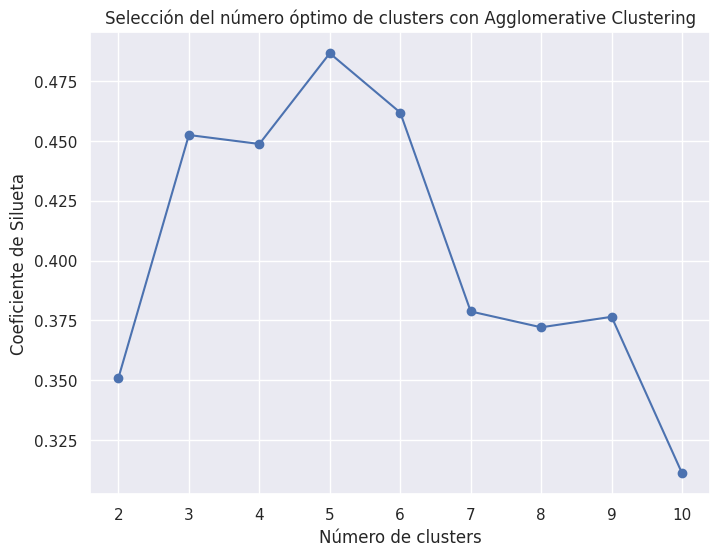

El número óptimo de clusters es: 5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


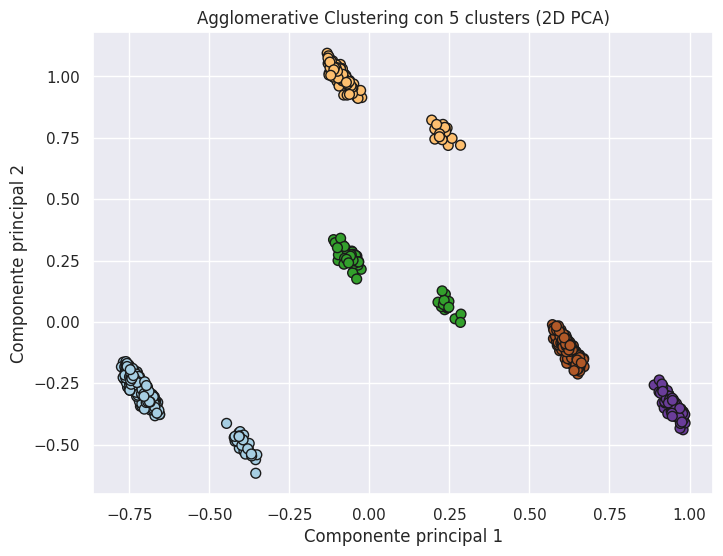

Coeficiente de silueta para Agglomerative Clustering con 5 clusters: 0.48663195675537363


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

# Función para dibujar un dendrograma para entender la estructura jerárquica
def plot_dendrogram(data, method='ward'):
    Z = linkage(data, method=method)
    plt.figure(figsize=(10, 6))
    dendrogram(Z)
    plt.title('Dendrograma para Agglomerative Clustering')
    plt.xlabel('Puntos de datos')
    plt.ylabel('Distancia')
    plt.show()

plot_dendrogram(data_normalized, method='ward')

# Definir el rango de n_clusters que vamos a probar
n_clusters_range = range(2, 11)
silhouette_scores = []

# Probar diferentes valores de n_clusters y calcular el coeficiente de silueta
for n_clusters in n_clusters_range:
    # Crear el modelo Agglomerative Clustering
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    labels = agg_clustering.fit_predict(data_normalized)

    silhouette_avg = silhouette_score(data_normalized, labels)
    silhouette_scores.append(silhouette_avg)

    print(f'Coeficiente de silueta para {n_clusters} clusters: {silhouette_avg}')

plt.figure(figsize=(8, 6))
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Coeficiente de Silueta')
plt.title('Selección del número óptimo de clusters con Agglomerative Clustering')
plt.show()

optimal_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]
print(f'El número óptimo de clusters es: {optimal_n_clusters}')

agg_clustering_optimal = AgglomerativeClustering(n_clusters=optimal_n_clusters, affinity='euclidean', linkage='ward')
labels_optimal = agg_clustering_optimal.fit_predict(data_normalized)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_normalized)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels_optimal, cmap='Paired', s=50, edgecolors='k')
plt.title(f'Agglomerative Clustering con {optimal_n_clusters} clusters (2D PCA)')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

# Calculo del coeficiente de silueta final con el número óptimo de clusters
silhouette_avg_optimal = silhouette_score(data_normalized, labels_optimal)
print(f'Coeficiente de silueta para Agglomerative Clustering con {optimal_n_clusters} clusters: {silhouette_avg_optimal}')

## 3) Validación Cuantitativa

## 4) Validación Cualitativa